In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [14]:
df = pd.read_csv('/work/kiva_loans_part_0.csv')
df1 = pd.read_csv('/work/kiva_loans_part_1.csv')
df2 = pd.read_csv('/work/kiva_loans_part_2.csv')
df3 = pd.read_csv('/work/kiva_mpi_region_locations.csv')
df4 = pd.read_csv('/work/loan_theme_ids.csv')
df5 = pd.read_csv('/work/loan_themes_by_region (1).csv')


In [16]:
df_new = pd.concat([df, df1, df2])

In [19]:
df_new


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-25
221201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25
221202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,NaN,monthly,2017-07-26
221203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26


In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671205 entries, 0 to 221204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-null  in

In [45]:
df_new.to_csv('/work/kiva_loans1.csv')

In [26]:
df_new.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [27]:
df_new.drop(columns=['use' , 'tags'], inplace=True)

In [31]:
df_new.dropna(subset=['region', 'partner_id', 'disbursed_time', 'funded_time', 'borrower_genders'], inplace=True)

In [32]:
df_new.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
221157    False
221163    False
221164    False
221170    False
221186    False
Length: 574127, dtype: bool

In [33]:
# Convert date-related columns to datetime
date_cols = ['posted_time', 'disbursed_time', 'funded_time', 'date']
df_new[date_cols] = df_new[date_cols].apply(pd.to_datetime, errors='coerce')

# Convert categorical columns to 'category' dtype
cat_cols = ['activity', 'sector', 'country_code', 'country', 'region', 'currency',
            'borrower_genders', 'repayment_interval']
df_new[cat_cols] = df_new[cat_cols].astype('category')

# Convert partner_id and term_in_months to int where applicable
df_new[['partner_id', 'term_in_months']] = df_new[['partner_id', 'term_in_months']].fillna(0).astype(int)

# Check updated data types
df_new.dtypes

id                                  int64
funded_amount                     float64
loan_amount                       float64
activity                         category
sector                           category
country_code                     category
country                          category
region                           category
currency                         category
partner_id                          int64
posted_time           datetime64[ns, UTC]
disbursed_time        datetime64[ns, UTC]
funded_time           datetime64[ns, UTC]
term_in_months                      int64
lender_count                        int64
borrower_genders                 category
repayment_interval               category
date                       datetime64[ns]
dtype: object

In [34]:
df_new.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count,date
count,5.741270e+05,574127.000000,574127.000000,574127.000000,574127.000000,574127.000000,574127
mean,9.927999e+05,758.391567,758.391567,180.249194,13.438011,20.112515,2015-11-17 18:00:44.657716224
min,6.530470e+05,25.000000,25.000000,9.000000,2.000000,1.000000,2014-01-01 00:00:00
25%,8.227815e+05,250.000000,250.000000,127.000000,8.000000,7.000000,2014-12-31 00:00:00
50%,9.917490e+05,450.000000,450.000000,145.000000,12.000000,13.000000,2015-12-08 00:00:00
75%,1.167732e+06,900.000000,900.000000,204.000000,14.000000,24.000000,2016-10-14 00:00:00
max,1.340300e+06,100000.000000,100000.000000,535.000000,158.000000,2986.000000,2017-07-24 00:00:00
std,1.971428e+05,1051.554879,1051.554879,94.988259,8.581805,27.716397,NaN


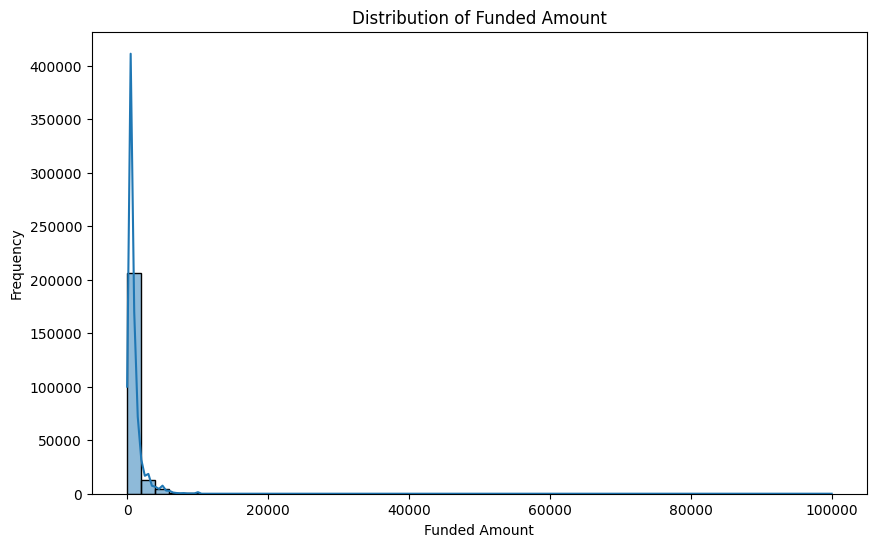

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['funded_amount'], bins=50, kde=True)
plt.title('Distribution of Funded Amount')
plt.xlabel('Funded Amount')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_11919/2637085034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='sector', data=df_new, order= df_new['sector'].value_counts().index, palette='rocket')


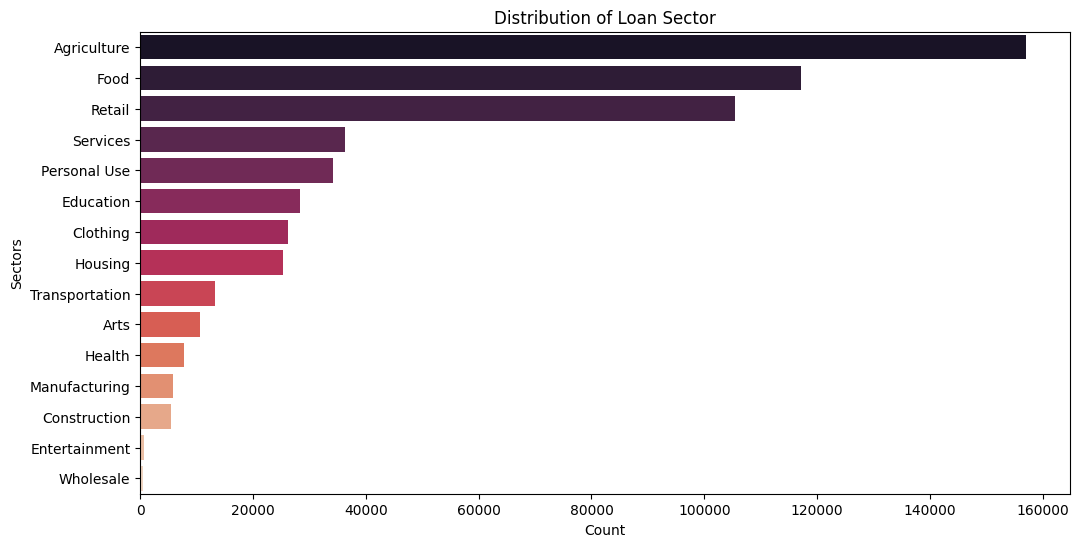

In [36]:

plt.figure(figsize=(12,6))
sns.countplot(y='sector', data=df_new, order= df_new['sector'].value_counts().index, palette='rocket')
plt.xticks(rotation=0)
plt.title('Distribution of Loan Sector')
plt.xlabel('Count')
plt.ylabel('Sectors')
plt.show()

/tmp/ipykernel_11919/1357743640.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries_avg_loan.index, y=top_10_countries_avg_loan.values, palette='rocket')


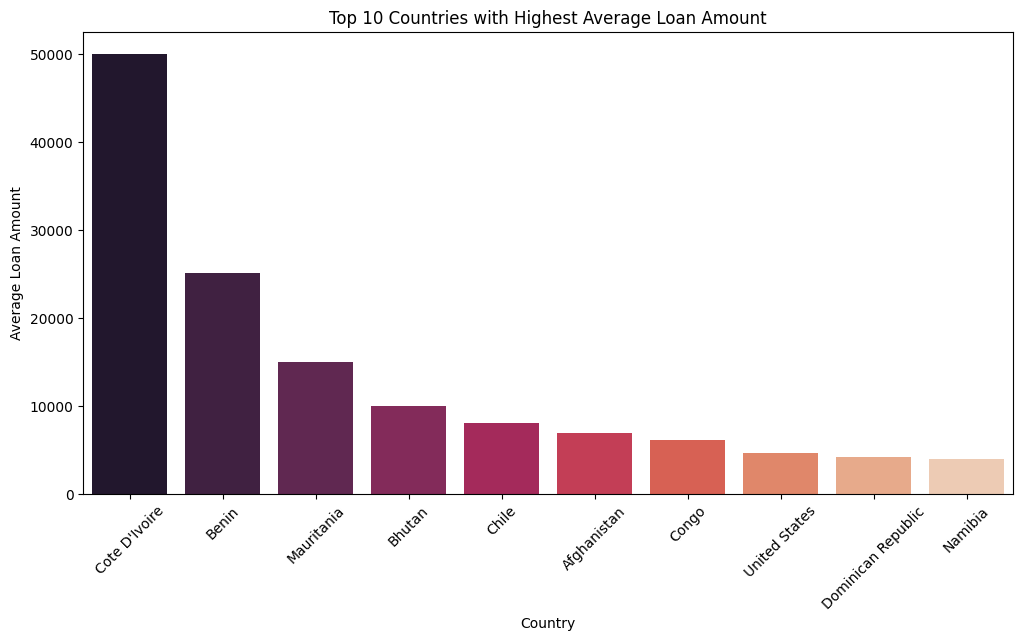

In [37]:
# Step 1: Remove rows with blank or missing country values and strip leading/trailing spaces
df_clean = df_new[df_new['country'].notna() & (df_new['country'].str.strip() != '')]
df_clean['country'] = df_clean['country'].str.strip()
top_10_countries_avg_loan = df_clean.groupby('country')['loan_amount'].mean().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_10_countries_avg_loan.index, y=top_10_countries_avg_loan.values, palette='rocket')
plt.title('Top 10 Countries with Highest Average Loan Amount')
plt.xlabel('Country')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.show()

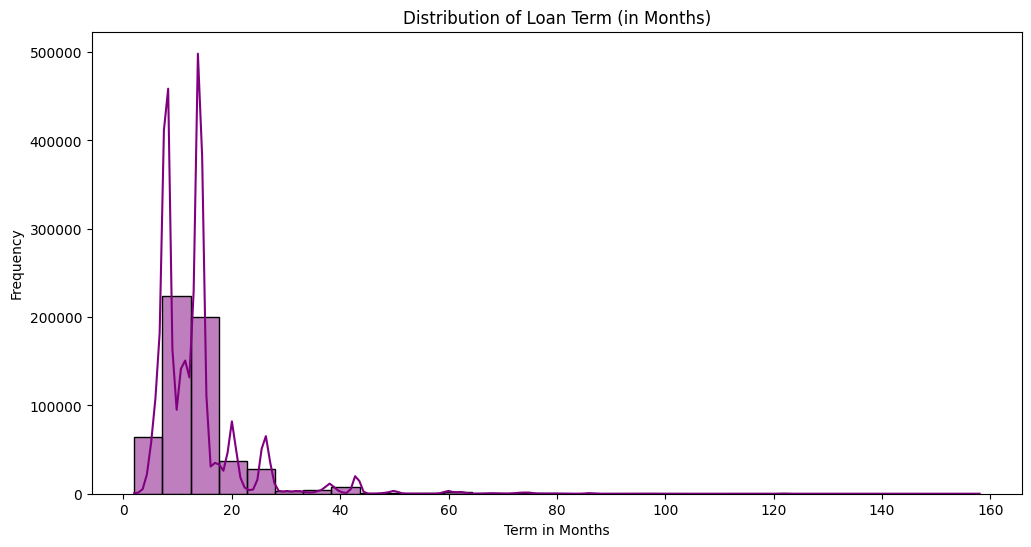

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df_new['term_in_months'], bins=30, kde=True, color='purple')
plt.title('Distribution of Loan Term (in Months)')
plt.xlabel('Term in Months')
plt.ylabel('Frequency')
plt.show()

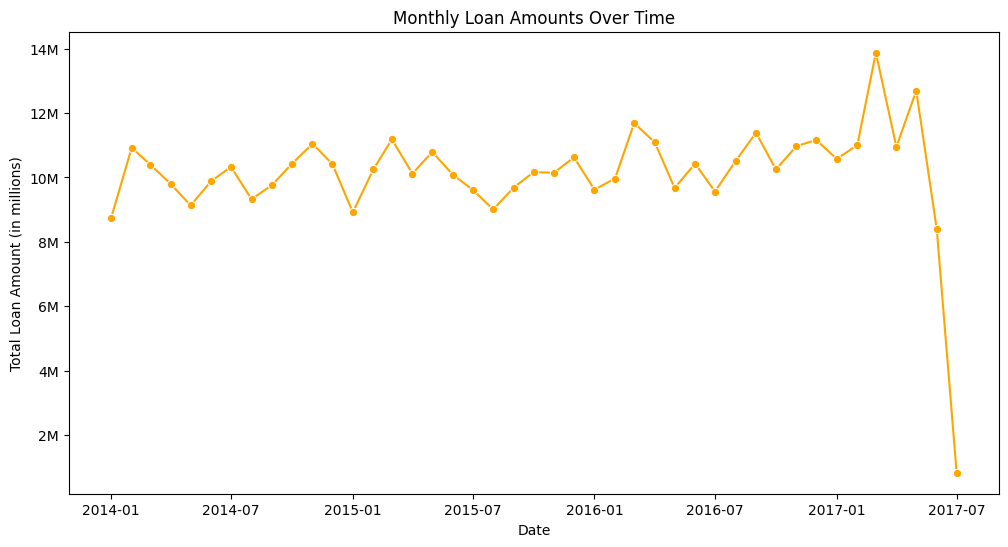

['female' 'male' 'female, male']


In [40]:
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

df_new['year'] = pd.to_datetime(df_new['date']).dt.year
df_new['month'] = pd.to_datetime(df_new['date']).dt.month

monthly_loan_amount = df_new.groupby(['year', 'month'])['loan_amount'].sum().reset_index()
monthly_loan_amount['date'] = pd.to_datetime(monthly_loan_amount[['year', 'month']].assign(day=1))

plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='loan_amount', data=monthly_loan_amount, marker='o', color='orange')
plt.title('Monthly Loan Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Loan Amount (in millions)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000000)}M'))
plt.xticks(rotation=0)
plt.show()
# Function to clean the borrower_genders column
def clean_gender(genders):
    # Split the string by comma and strip spaces, then take the unique values
    unique_genders = set([gender.strip() for gender in genders.split(',')])
    # Join them back into a single string
    return ', '.join(sorted(unique_genders))

# Apply the function to clean the borrower_genders column
df_new['borrower_genders'] = df_new['borrower_genders'].apply(clean_gender)

# Check the unique values after cleaning
print(df_new['borrower_genders'].unique())

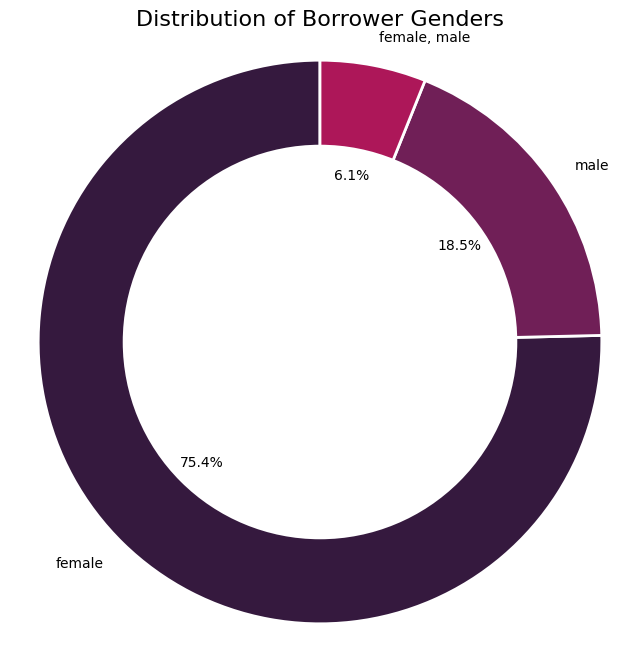

In [41]:
# Count the frequency of each gender
gender_counts = df_new['borrower_genders'].value_counts()

# Create a figure
plt.figure(figsize=(8,8))

# Pie chart
plt.pie(gender_counts, labels=gender_counts.index, colors=sns.color_palette('rocket'),
        autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Add a center circle for the "doughnut" effect
center_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(center_circle)

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')

# Title
plt.title('Distribution of Borrower Genders', fontsize=16)

# Show plot
plt.show()

In [46]:
df_new.to_csv('/work/kiva_loans_cleaned.csv', index=False)